In [1]:
import pandas
import os
import time
import numpy as np
from matplotlib import pyplot as plt
print('ok')

ok


In [2]:
os.chdir('/home/idies/workspace/Storage/raddick/baseball/')
s = time.time()
print('Reading stuff...')
games_df = pandas.read_csv('gamedata_extended.csv', low_memory=False, index_col='gameID')
#games_df.sample(2).T

print('Converting stuff...')
games_df.loc[:, 'date'] = pandas.to_datetime(games_df['date'])

print('Calculating stuff...')
games_df = games_df.assign(theyear = games_df['date'].apply(lambda x: x.year))
games_df = games_df.assign(total_hr = (games_df['home_hr'] + games_df['visitor_hr']))
e = time.time()

print('Processed {0:,.0f} games in {1:.1f} seconds!'.format(len(games_df),e-s))

print('DONE!')
#sorted(games_df.columns.tolist())
                   

Reading stuff...
Converting stuff...
Calculating stuff...
Processed 217,224 games in 29.2 seconds!
DONE!


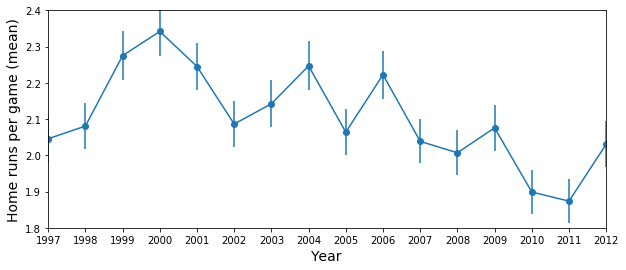

In [6]:
#sorted(games_df.columns.tolist())

hr_by_year = games_df.groupby('theyear')['total_hr'].mean()
hr_by_year = hr_by_year.dropna()[hr_by_year > 0]

hr_by_year_stderrmean = games_df.groupby('theyear')['total_hr'].sem()

hr_by_year.plot(marker='o', figsize=(10,4), yerr=2*hr_by_year_stderrmean) # use 2*sem for 95% conf intervals
plt.xlim([1997,2012])
plt.ylim([1.8,2.4])
plt.xticks(np.arange(1997,2013,1))
#plt.yticks(np.arange(4400,5801,200))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Home runs per game (mean)', fontsize=14)
plt.show()
#games_df.dtypes
#games_df['total_hr'].dropna()
